In [1]:
%autosave 10

import pandas as pd
import math

from HW5Utils import *
from KParameters import *

Autosaving every 10 seconds


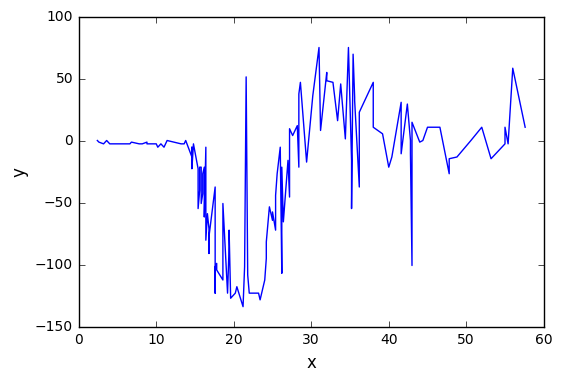

In [2]:
data = getData('non-parametric.csv')
showData(data)

In [3]:
kernels = [
    (lambda x: gaussianKernel(x), 'Gaussian'),
    (lambda x: epanechnikovKernel(x), 'Epanechnikov')
]

In [4]:
def kernelRegressionCalculation(testPoint, trainSet, params):
    numerator = 0
    denominator = 0
    h = params.h
    if h is None:
        distances = []
        for trainPoint in trainSet.as_matrix([['x', 'y']]):
            distances.append(abs(testPoint[0] - trainPoint[0]))
        distances = sorted(distances)
        h = distances[params.k - 1]
    for trainPoint in trainSet.as_matrix([['x', 'y']]):
        numerator += trainPoint[1] * params.kernel[0](abs(testPoint[0] - trainPoint[0]) / h)
        denominator += params.kernel[0](abs(testPoint[0] - trainPoint[0]) / h)
    return float('inf') if denominator == 0 else numerator / denominator

def kernelRegression(data):
    H_MIN = 10 ** (-9)
    H_MAX = 10 ** 9
    H_STEP = 10
    
    K_MIN = 5
    K_MAX = 20
    K_STEP = 1
    
    params = KParameters(mse=float('inf'))
    for kernel in kernels:
        h = H_MIN
        while h <= H_MAX:
            mse = 0.0
            for i in range(len(data)):
                testPoint = list(data.loc[i])[1:]
                trainSet = pd.concat([data[:i], data[(i + 1):]])
                predictedValue = kernelRegressionCalculation(testPoint, trainSet, KParameters(kernel=kernel, h=h))
                mse += math.pow(predictedValue - testPoint[1], 2)
            mse /= len(data)
            if mse < params.mse:
                params = KParameters(kernel=kernel, h=h, mse=mse)
            h *= H_STEP
        k = K_MIN
        while k <= K_MAX:
            mse = 0.0
            for i in range(len(data)):
                testPoint = list(data.loc[i])[1:]
                trainSet = pd.concat([data[:i], data[(i + 1):]])
                predictedValue = kernelRegressionCalculation(testPoint, trainSet, KParameters(kernel=kernel, k=k))
                mse += math.pow(predictedValue - testPoint[1], 2)
            mse /= len(data)
            if mse < params.mse:
                params = KParameters(kernel=kernel, k=k, mse=mse)
            k += K_STEP
    return params

In [5]:
bestParameters = kernelRegression(data)
print(bestParameters)

{kernel=Gaussian, h=None, k=7, mse=932.1389340738111}


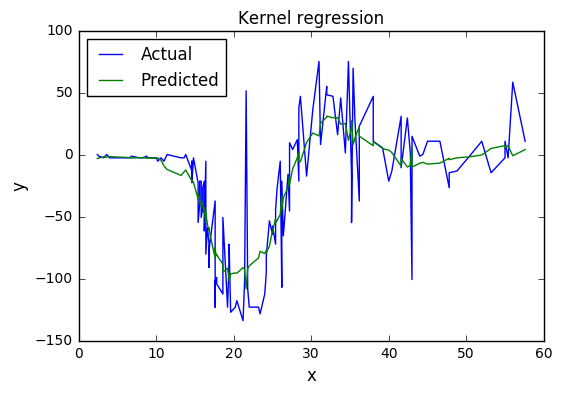

In [6]:
predictedData = pd.DataFrame(columns=['x', 'y'])
for i in range(len(data)):
    testPoint = list(data.loc[i])[1:]
    trainSet = pd.concat([data[:i], data[(i + 1):]])
    predictedValue = kernelRegressionCalculation(testPoint, trainSet, bestParameters)
    resultPoint = pd.DataFrame([[testPoint[0], predictedValue]], columns=['x', 'y'])
    predictedData = predictedData.append(resultPoint, ignore_index=True)

showPredictedData(data, predictedData)